In [1]:
#import library
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Data Clean
Combine all the data, choose metric

In [2]:
df1 = pd.read_csv("listings_Aug.csv")
df2 = pd.read_csv("listings_Jul.csv")
df3 = pd.read_csv("listings_Jun.csv")
df4 = pd.read_csv("listings_Sep.csv")

In [3]:
df = pd.concat([df1, df2, df3, df4])

In [4]:
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.949370e+05,1.949370e+05,0.0,0.0,0.0,1.949370e+05,0.0,194864.000000,194864.000000,194937.000000,...,151066.000000,150931.000000,151020.000000,150915.000000,150920.00000,194937.000000,194937.000000,194937.000000,194937.000000,154979.000000
mean,1.920626e+07,2.019076e+13,NaN,NaN,NaN,6.875024e+07,NaN,14.931234,14.931234,40.728892,...,9.277025,9.747852,9.755734,9.564642,9.39829,7.428108,5.792492,1.482797,0.114350,1.369951
std,1.112289e+07,1.148037e+08,NaN,NaN,NaN,7.977780e+07,NaN,88.492453,88.492453,0.054628,...,1.081108,0.712790,0.722937,0.759635,0.90775,34.606020,33.749277,5.979127,1.016152,1.677797
min,2.539000e+03,2.019060e+13,NaN,NaN,NaN,2.420000e+03,NaN,0.000000,0.000000,40.499790,...,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.514193e+06,2.019060e+13,NaN,NaN,NaN,7.958923e+06,NaN,1.000000,1.000000,40.689930,...,9.000000,10.000000,10.000000,9.000000,9.00000,1.000000,0.000000,0.000000,0.000000,0.190000
50%,1.980826e+07,2.019071e+13,NaN,NaN,NaN,3.151576e+07,NaN,1.000000,1.000000,40.723060,...,10.000000,10.000000,10.000000,10.000000,10.00000,1.000000,1.000000,1.000000,0.000000,0.710000
75%,2.939049e+07,2.019081e+13,NaN,NaN,NaN,1.079785e+08,NaN,2.000000,2.000000,40.763110,...,10.000000,10.000000,10.000000,10.000000,10.00000,2.000000,1.000000,1.000000,0.000000,2.010000
max,3.856808e+07,2.019091e+13,NaN,NaN,NaN,2.941850e+08,NaN,1611.000000,1611.000000,40.915300,...,10.000000,10.000000,10.000000,10.000000,10.00000,387.000000,380.000000,115.000000,23.000000,67.600000


In [5]:
df.shape

(194937, 106)

In [6]:
# Choose the metrics that correlated to the price. 
df_cleaned = df[["id", "summary","house_rules", "host_response_time", "host_response_rate", "neighbourhood_group_cleansed", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "price", "security_deposit", "cleaning_fee", "guests_included", "extra_people", "availability_365", "number_of_reviews", "review_scores_rating", "cancellation_policy", "reviews_per_month"]]
df_cleaned['summary']=df_cleaned['summary'].fillna('N')
df_cleaned['house_rules'] = df_cleaned['house_rules'].fillna('N')
df_cleaned.dropna(inplace=True)
df_cleaned.shape

(81233, 21)

In [7]:
#df_cleaned.head()

In [8]:
# Check the Deplicated data
df_cleaned['CheckDup'] = df_cleaned.duplicated(subset=None, keep='first')
df_cleaned[df_cleaned['CheckDup']==True].shape

(370, 22)

In [9]:
#drop the duplicated data
df_cleaned.drop_duplicates(keep='first',inplace=True)

In [10]:
df_final = df_cleaned
df_final.head()

,id,summary,house_rules,host_response_time,host_response_rate,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,...,security_deposit,cleaning_fee,guests_included,extra_people,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,CheckDup
0,2595,"Find your romantic getaway to this beautiful, ...","Make yourself at home, respect the space and t...",within a few hours,90%,Manhattan,Entire home/apt,2,1.0,0.0,...,$350.00,$100.00,2,$0.00,288,46,95.0,strict_14_with_grace_period,0.39,False
4,5099,My large 1 bedroom apartment is true New York ...,• Check-in time is 2PM. • Check-out time is 12...,within a few hours,90%,Manhattan,Entire home/apt,2,1.0,1.0,...,$300.00,$125.00,2,$100.00,127,75,89.0,strict_14_with_grace_period,0.60,False
8,5222,N,Please let me know if you will be staying with...,within a day,100%,Manhattan,Entire home/apt,2,1.0,1.0,...,$500.00,$75.00,2,$15.00,322,94,95.0,strict_14_with_grace_period,0.74,False
9,5238,"Live like a New Yorker instead of a stuffy, ti...",No smoking in apartment. No Pets allowed. Ple...,within a few hours,100%,Manhattan,Entire home/apt,3,1.0,1.0,...,$0.00,$40.00,2,$10.00,0,161,94.0,strict_14_with_grace_period,1.33,False
10,5295,N,"Dear Guests, Welcome to my apartment and I hop...",within a day,100%,Manhattan,Entire home/apt,2,1.0,1.0,...,$450.00,$75.00,1,$0.00,1,53,93.0,strict_14_with_grace_period,0.42,False


In [49]:
# writing data to local for visulization
df_final.to_csv("visu_data.csv", sep = ",", index = False)

# Transform variables to construct feature

 Convert Summary and House_rules into length 

In [12]:
#convert summary/hourserules to len of summary -> numeric dat
df_final['summary_len'] = df_final['summary'].str.split().str.len()
df_final['houserules_len'] = df_final['house_rules'].str.split().str.len()

In [13]:
df_final["host_response_time"].unique()

array(['within a few hours', 'within a day', 'within an hour',
       'a few days or more'], dtype=object)

In [14]:
# df_final['a few hours'] = (df_final['host_response_time'] == 'within a few hours')
# df_final['a day'] = (df_final['host_response_time'] == 'within a day')
# df_final['an hour'] = (df_final['host_response_time'] == 'within an hour')
# df_final['a few days or more'] = (df_final['host_response_time'] == 'a few days or more')

# df_final[['a few hours','a day','an hour','a few days or more']] = df_final[['a few hours','a day','an hour','a few days or more']].astype(int)

In [15]:
#df_final = df_final.drop(['a few hours'], axis=1)

In [16]:
df_final = pd.get_dummies(df_final,columns=['host_response_time'])

In [17]:
df_final = df_final.rename({'host_response_time_within a few hours':'a few hours','host_response_time_within a day':'a day','host_response_time_within an hour':'an hour','host_response_time_a few days or more':'a few days or more'},axis = 1) 

In [18]:
df_final[['a few hours','a day','an hour','a few days or more']] = df_final[['a few hours','a day','an hour','a few days or more']].astype(int)

In [19]:
#neighbourhood_group_cleansed
df_final['Manhattan'] = (df_final['neighbourhood_group_cleansed'] == 'Manhattan')
df_final['Brooklyn'] = (df_final['neighbourhood_group_cleansed'] == 'Brooklyn')
df_final['Queens'] = (df_final['neighbourhood_group_cleansed'] == 'Queens')
df_final['Bronx'] = (df_final['neighbourhood_group_cleansed'] == 'Bronx')
df_final['Staten_Island'] = (df_final['neighbourhood_group_cleansed'] == 'Staten Island')

df_final[['Manhattan','Brooklyn','Queens','Bronx','Staten_Island']] = df_final[['Manhattan','Brooklyn','Queens','Bronx','Staten_Island']].astype(int)
#df_final['Others'] = df_final['Bronx'] + df_final['Staten_Island']

In [20]:
#df_final = df_final.drop(['Others'], axis=1)

In [21]:
#room type
df_final['Entire home'] = (df_final['room_type'] == 'Entire home/apt')
df_final['Private_room'] = (df_final['room_type'] == 'Private room')
df_final['Shared_room'] = (df_final['room_type'] == 'Shared room')

df_final[['Entire home','Private_room','Shared_room']] = df_final[['Entire home','Private_room','Shared_room']].astype(int)

In [22]:
# cancellation policy
df_final['flexible'] = (df_final['cancellation_policy'] == 'flexible')
df_final['moderate'] = (df_final['cancellation_policy'] == 'moderate')
df_final['strict_14'] = (df_final['cancellation_policy'] == 'strict_14_with_grace_period')
df_final['strict_30'] = (df_final['cancellation_policy'] == 'super_strict_30')
df_final['strict'] = (df_final['cancellation_policy'] == 'strict')

df_final[['flexible','moderate','strict_14','strict_30','strict']] = df_final[['flexible','moderate','strict_14','strict_30','strict']].astype(int)
#df_final.head()

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81185 entries, 0 to 48091
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            81185 non-null  int64  
 1   summary                       81185 non-null  object 
 2   house_rules                   81185 non-null  object 
 3   host_response_rate            81185 non-null  object 
 4   neighbourhood_group_cleansed  81185 non-null  object 
 5   room_type                     81185 non-null  object 
 6   accommodates                  81185 non-null  int64  
 7   bathrooms                     81185 non-null  float64
 8   bedrooms                      81185 non-null  float64
 9   beds                          81185 non-null  float64
 10  price                         81185 non-null  object 
 11  security_deposit              81185 non-null  object 
 12  cleaning_fee                  81185 non-null  object 
 13  g

In [24]:
df_done = df_final.drop(columns = ['summary','house_rules','CheckDup','strict','neighbourhood_group_cleansed','room_type','cancellation_policy'])
#df_done.head()

In [25]:
df_done.dtypes

id                        int64
host_response_rate       object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
price                    object
security_deposit         object
cleaning_fee             object
guests_included           int64
extra_people             object
availability_365          int64
number_of_reviews         int64
review_scores_rating    float64
reviews_per_month       float64
summary_len               int64
houserules_len            int64
a few days or more        int64
a day                     int64
a few hours               int64
an hour                   int64
Manhattan                 int64
Brooklyn                  int64
Queens                    int64
Bronx                     int64
Staten_Island             int64
Entire home               int64
Private_room              int64
Shared_room               int64
flexible                  int64
moderate                  int64
strict_1

In [26]:
# remove$ ->num
df_done['price']=df_done['price'].str.replace('$','')
df_done['price']=df_done['price'].str.replace(',','')
df_done['price'] = df_done['price'].astype(float)
df_done['price'].head()

0     225.0
4     200.0
8     116.0
9     150.0
10    135.0
Name: price, dtype: float64

In [27]:
#percentage -> num
df_done['host_response_rate']=df_done['host_response_rate'].str.replace('%','')
df_done['host_response_rate'] = df_done['host_response_rate'].astype(float)
df_done['host_response_rate'] = df_done['host_response_rate']/100
df_done['host_response_rate'].head()

0     0.9
4     0.9
8     1.0
9     1.0
10    1.0
Name: host_response_rate, dtype: float64

In [28]:
#remove$
df_done['security_deposit']=df_done['security_deposit'].str.replace('$','')
df_done['security_deposit']=df_done['security_deposit'].str.replace(',','')
df_done['security_deposit'].head()

0     350.0
4     300.0
8     500.0
9       0.0
10    450.0
Name: security_deposit, dtype: object

In [29]:
#remove$
df_done['cleaning_fee']=df_done['cleaning_fee'].str.replace('$','')
df_done['cleaning_fee']=df_done['cleaning_fee'].str.replace(',','')
df_done['cleaning_fee'].head()

0     100.0
4     125.0
8      75.0
9      40.0
10     75.0
Name: cleaning_fee, dtype: object

In [30]:
#remove$
df_done['extra_people']=df_done['extra_people'].str.replace('$','')
df_done['extra_people']=df_done['extra_people'].str.replace(',','')
df_done['extra_people'].head()

0       0.0
4     100.0
8      15.0
9      10.0
10      0.0
Name: extra_people, dtype: object

In [31]:
df_done.head()

,id,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,Queens,Bronx,Staten_Island,Entire home,Private_room,Shared_room,flexible,moderate,strict_14,strict_30
0,2595,0.9,2,1.0,0.0,1.0,225.0,350.0,100.0,2,...,0,0,0,1,0,0,0,0,1,0
4,5099,0.9,2,1.0,1.0,1.0,200.0,300.0,125.0,2,...,0,0,0,1,0,0,0,0,1,0
8,5222,1.0,2,1.0,1.0,1.0,116.0,500.0,75.0,2,...,0,0,0,1,0,0,0,0,1,0
9,5238,1.0,3,1.0,1.0,2.0,150.0,0.0,40.0,2,...,0,0,0,1,0,0,0,0,1,0
10,5295,1.0,2,1.0,1.0,1.0,135.0,450.0,75.0,1,...,0,0,0,1,0,0,0,0,1,0


# Modeling
Z score, detect outliner, Feature selection

In [32]:
# drop columns
df_done1 = df_done.drop(columns = ['id', 'a few hours', 'a day', 'an hour', 'a few days or more','flexible', 'moderate', 'strict_14', 'strict_30'])
df_done1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81185 entries, 0 to 48091
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    81185 non-null  float64
 1   accommodates          81185 non-null  int64  
 2   bathrooms             81185 non-null  float64
 3   bedrooms              81185 non-null  float64
 4   beds                  81185 non-null  float64
 5   price                 81185 non-null  float64
 6   security_deposit      81185 non-null  object 
 7   cleaning_fee          81185 non-null  object 
 8   guests_included       81185 non-null  int64  
 9   extra_people          81185 non-null  object 
 10  availability_365      81185 non-null  int64  
 11  number_of_reviews     81185 non-null  int64  
 12  review_scores_rating  81185 non-null  float64
 13  reviews_per_month     81185 non-null  float64
 14  summary_len           81185 non-null  int64  
 15  houserules_len     

In [33]:
list(df_done1.columns)
df_done1.columns = ['host_response_rate',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'reviews_per_month',
 'summary_len',
 'houserules_len',
 'Manhattan',
 'Brooklyn',
 'Queens',
 'Bronx',
 'Staten_Island',
 'Entire_home',
 'Private_room',
 'Shared_room']

In [34]:
from sklearn.model_selection import train_test_split
X = df_done1.drop('price',axis=1).values
y = df_done1['price'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [35]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_done1.columns)

### Feature engineering

In [37]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(20,'Score'))

                   Specs         Score
5                  price  9.877919e+06
6       security_deposit  1.660605e+06
9           extra_people  3.473598e+05
14           summary_len  3.360757e+05
10      availability_365  2.198020e+05
8        guests_included  1.787220e+05
1           accommodates  4.812739e+04
13     reviews_per_month  2.548726e+04
4                   beds  2.493654e+04
7           cleaning_fee  2.284714e+04
21           Entire_home  2.191496e+04
20         Staten_Island  1.853515e+04
3               bedrooms  1.407779e+04
22          Private_room  1.388685e+04
15        houserules_len  7.108965e+03
17              Brooklyn  4.555423e+03
2              bathrooms  4.248071e+03
12  review_scores_rating  3.782436e+03
18                Queens  3.223084e+03
16             Manhattan  2.501787e+03


In [38]:
# fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [39]:
import matplotlib.pyplot as plt
features=df_done1.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

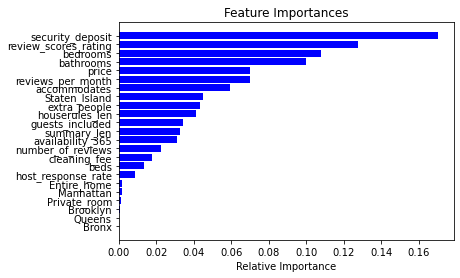

In [40]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

reviews_per_month is one of important feature in the data analysis, but I don't think it is import for the renter to predict the price

In [41]:
# move price to the last column and remove more columns based on common sense and data analysis
list(df_done1.columns)
df_done2 = df_done1[[
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'number_of_reviews',
 'review_scores_rating',
 'Manhattan',
 'Brooklyn',
 'Queens',
 'Entire_home',
 'Private_room',
 'Shared_room',
 'price']]

In [42]:
df_done2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81185 entries, 0 to 48091
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             81185 non-null  float64
 1   bedrooms              81185 non-null  float64
 2   beds                  81185 non-null  float64
 3   security_deposit      81185 non-null  object 
 4   cleaning_fee          81185 non-null  object 
 5   guests_included       81185 non-null  int64  
 6   extra_people          81185 non-null  object 
 7   number_of_reviews     81185 non-null  int64  
 8   review_scores_rating  81185 non-null  float64
 9   Manhattan             81185 non-null  int64  
 10  Brooklyn              81185 non-null  int64  
 11  Queens                81185 non-null  int64  
 12  Entire_home           81185 non-null  int64  
 13  Private_room          81185 non-null  int64  
 14  Shared_room           81185 non-null  int64  
 15  price              

In [43]:
# change the all the data type to int
df_done2[['bathrooms','bedrooms','beds','security_deposit','cleaning_fee','extra_people','review_scores_rating','price']] = df_done2[['bathrooms','bedrooms','beds','security_deposit','cleaning_fee','extra_people','review_scores_rating','price']].astype(float)
df_done2[['bathrooms','bedrooms','beds','security_deposit','cleaning_fee','extra_people','review_scores_rating','price']] = df_done2[['bathrooms','bedrooms','beds','security_deposit','cleaning_fee','extra_people','review_scores_rating','price']].astype(int)

### Detect outliner

In [44]:
#detect outlines use z score
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(df_done2))

In [45]:
#  remove outlines
threshold = 3
np.where(z > 3)

df_done2.shape
df_o = df_done2[(z < 3).all(axis=1)]
df_o.shape

(70478, 16)

In [46]:
# writing data to local 
df_o.to_csv("Final_dataset.csv", sep = ",", index = False)